### Early Stage Diabetes Risk Prediction

Diabetes is one of the fastest growing chronic life threatening diseases that have already affected 422 million people worldwide according to the report of World Health Organization (WHO), in 2018.

To predict the likelihood of having diabetes requires a dataset, which contains the data of patients who are at risk of diabetes and not at risk. We will utilise a dataset obtained from the UCI machine learning repository which contains 520 instances collected using direct quastionnaires from the patients of Sylhet Diabetes Hospital in Bangladesh. https://doi.org/10.1007/978-981-13-8798-2_12

#### Import the necessary library

In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

#### Data loading

Data Dictionary

The fields contain data gotten from each participant

Age - ages of participants (20 - 65)          
Gender - gender of the participants
Polyuria - the passage of large volumes of urine with an increase in urinary frequency (Yes, No)

Polydipsia - excessive thirst (Yes, No)        
sudden weight loss - (Yes, No)
weakness - (Yes, No) 
Polyphagia - consumption of excessive amounts of food (Yes, No)  
Genital thrush - common yeast infection (Yes, No)
visual blurring - (Yes, No)
Itching - (Yes, No)      
Irritability - (Yes, No)
delayed healing - (Yes, No)
partial paresis - partial weakening of a muscle or group of muscles (Yes, No)
muscle stiffness - (Yes, No)
Alopecia - hair loss (Yes, No)   
Obesity - (Yes, No)      
class - Positive, Negative 


In [4]:
df = pd.read_csv('diabetes_data_upload.csv')

In [5]:
# explicit conersion of objects to categorical data type

# Get the column names with object data type
object_columns = df.select_dtypes(include='object').columns

# Convert the columns to categorical
df[object_columns] = df[object_columns].astype('category')

print(df.dtypes)


Age                      int64
Gender                category
Polyuria              category
Polydipsia            category
sudden weight loss    category
weakness              category
Polyphagia            category
Genital thrush        category
visual blurring       category
Itching               category
Irritability          category
delayed healing       category
partial paresis       category
muscle stiffness      category
Alopecia              category
Obesity               category
class                 category
dtype: object


In [6]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [7]:
df.shape

(520, 17)

#### Data Exploration

First, we just have a quick glance of the distributions across some fields

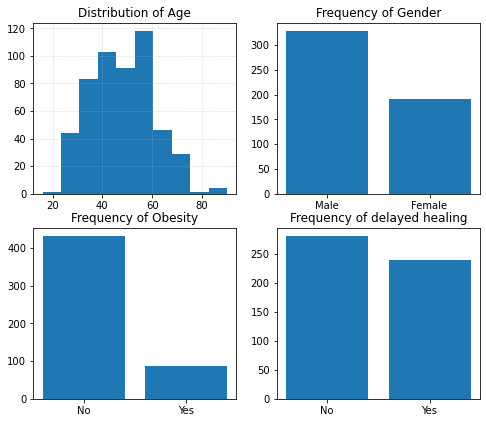

In [8]:
fig = plt.figure(figsize = [8, 6])

fig.tight_layout()

# distribution of age
plt.subplot(2, 2, 1)
plt.hist(df['Age'])
plt.title('Distribution of Age')
plt.grid(which='major', linestyle=':', linewidth='0.5')

# frequency of gender 
gen_counts = df['Gender'].value_counts()

plt.subplot(2, 2, 2)
plt.bar(gen_counts.index, gen_counts.values)
plt.title('Frequency of Gender')

# frequency of obesity 
ob_counts = df['Obesity'].value_counts()

plt.subplot(2, 2, 3)
plt.bar(ob_counts.index, ob_counts.values)
plt.title('Frequency of Obesity')

# frequency of delayed healing symptoms 
dh_counts = df['delayed healing'].value_counts()

plt.subplot(2, 2, 4)
plt.bar(dh_counts.index, dh_counts.values)
plt.title('Frequency of delayed healing')



plt.subplots_adjust(bottom = 0.01)
plt.show()

From the visuals above, we can observe that the ages is normally distributed across the dataset (with majority of the participants being between 20 to 80). There are more male participants, a small amount of the participants are obese, and quite a number seems to be experience delayed healing.

In [9]:
df['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

In [10]:
# cross-tabulation
cross_tab = pd.crosstab(df['delayed healing'], df['class'])

# display results
print(cross_tab)

class            Negative  Positive
delayed healing                    
No                    114       167
Yes                    86       153


A significant amount of participants who experience delayed healing were positive as newly diabetics. And the number of participants who do not experience delayed healing was quite shared across the positive and negative classes.

In [11]:
# cross-tabulation
cross_tab1 = pd.crosstab(df['Obesity'], df['class'])

# display results
print(cross_tab)

class            Negative  Positive
delayed healing                    
No                    114       167
Yes                    86       153


A higher amount of the participants who were obese were positive for diabetes.

#### Data Preprocessing

As most machine learning algorithms work with numerical data. By one-hot encoding categorical variables, we transform them into a numerical representation that can be easily understood by these algorithms.

one-hot encoding is a crucial preprocessing step to convert categorical variables into a suitable format for machine learning algorithms. It enables the algorithms to effectively learn from categorical data and make accurate predictions or classifications.

In [12]:
# Get the column names with object data type
cat_columns = df.select_dtypes(include='category').columns

# extract categorical data as a dataframe
X_categorical = df[cat_columns]

In [13]:
# Perform one-hot encoding using get_dummies()
df_encoded = pd.get_dummies(df, columns=cat_columns)

# Print the encoded DataFrame
# print(df_encoded)

##### Saving the one-hot encoding mapping as a file

In [14]:
with open('pre-process.pkl', 'wb') as file:
    pickle.dump(df_encoded, file)

In [15]:
df_encoded.head()

,Age,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,...,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes,class_Negative,class_Positive
0,40,0,1,1,0,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1
1,58,0,1,1,0,1,0,1,0,0,...,0,1,1,0,0,1,1,0,0,1
2,41,0,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,0,0,1
3,45,0,1,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,0,1
4,60,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1


#### Train and test split

In [16]:
# Separate the features (X) and the target variable (y)
x1 = df_encoded.drop('class_Negative', axis='columns')
X = x1.drop('class_Positive', axis='columns')
y = df_encoded['class_Positive']

In [17]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=123, shuffle=True, stratify=y)

In [18]:
X_train.shape

(364, 31)

### Model training

#### Random forest prediction

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [20]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred_rf = clf.predict(X_test)

In [22]:
# evaluation metrics (accuracy of prediction)
from sklearn.metrics import accuracy_score

print('Accuracy (RF): ',accuracy_score(y_test, y_pred_rf))

Accuracy (RF):  0.9551282051282052


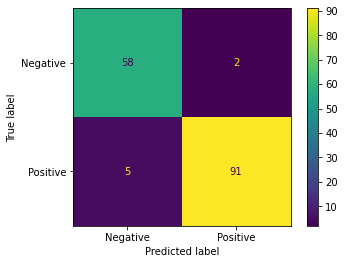

In [23]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp_rf = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), 
                              display_labels= ['Negative', 'Positive'])
disp_rf.plot()
plt.show()

In [24]:
# confusion matrix
from sklearn.metrics import precision_score, recall_score

# evaluation metrics (accuracy of prediction)
from sklearn.metrics import accuracy_score

print('Precision (RF): ',precision_score(y_test, y_pred_rf))

print('Recall (RF): ',recall_score(y_test, y_pred_rf))

Precision (RF):  0.978494623655914
Recall (RF):  0.9479166666666666


#### Support vector machine classifier

In [25]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [26]:
y_pred_svm = clf_svm.predict(X_test)

In [27]:
# evaluation metrics (accuracy of prediction)
print('Accuracy (SVM): ',accuracy_score(y_test, y_pred_svm))

Accuracy (SVM):  0.9102564102564102


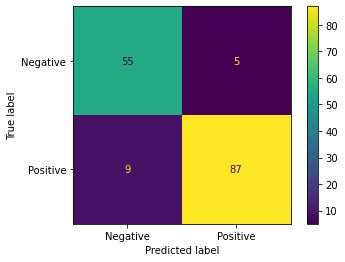

In [28]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp_svm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm), 
                              display_labels= ['Negative', 'Positive'])
disp_svm.plot()
plt.show()

#### Summary

Random forest gives us a better accuracy for this prediction task hence it is the model we take to be the best for this case and we will use this random forest for deployment.

#### Saving the trained model

In [29]:
with open('model.pkl', 'wb') as file:
    pickle.dump(clf, file)